In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('premiums_rest.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [3]:
df['Genetical_Risk']=0

In [4]:
df.shape

(29904, 14)

In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [6]:
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           9
Employment_Status        1
Income_Level             9
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
Genetical_Risk           0
dtype: int64

Some rows in the DataFrame contain null values, so we are removing those rows to ensure data quality.

In [7]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
Genetical_Risk           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

Currently, there are no duplicate records in the dataset. However, to handle any future data additions that may contain duplicates, we are applying the following step to remove them

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount,Genetical_Risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


### Data Cleaning

In [11]:
numeric_columns=df.select_dtypes(include='number').columns
numeric_columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount',
       'Genetical_Risk'],
      dtype='object')

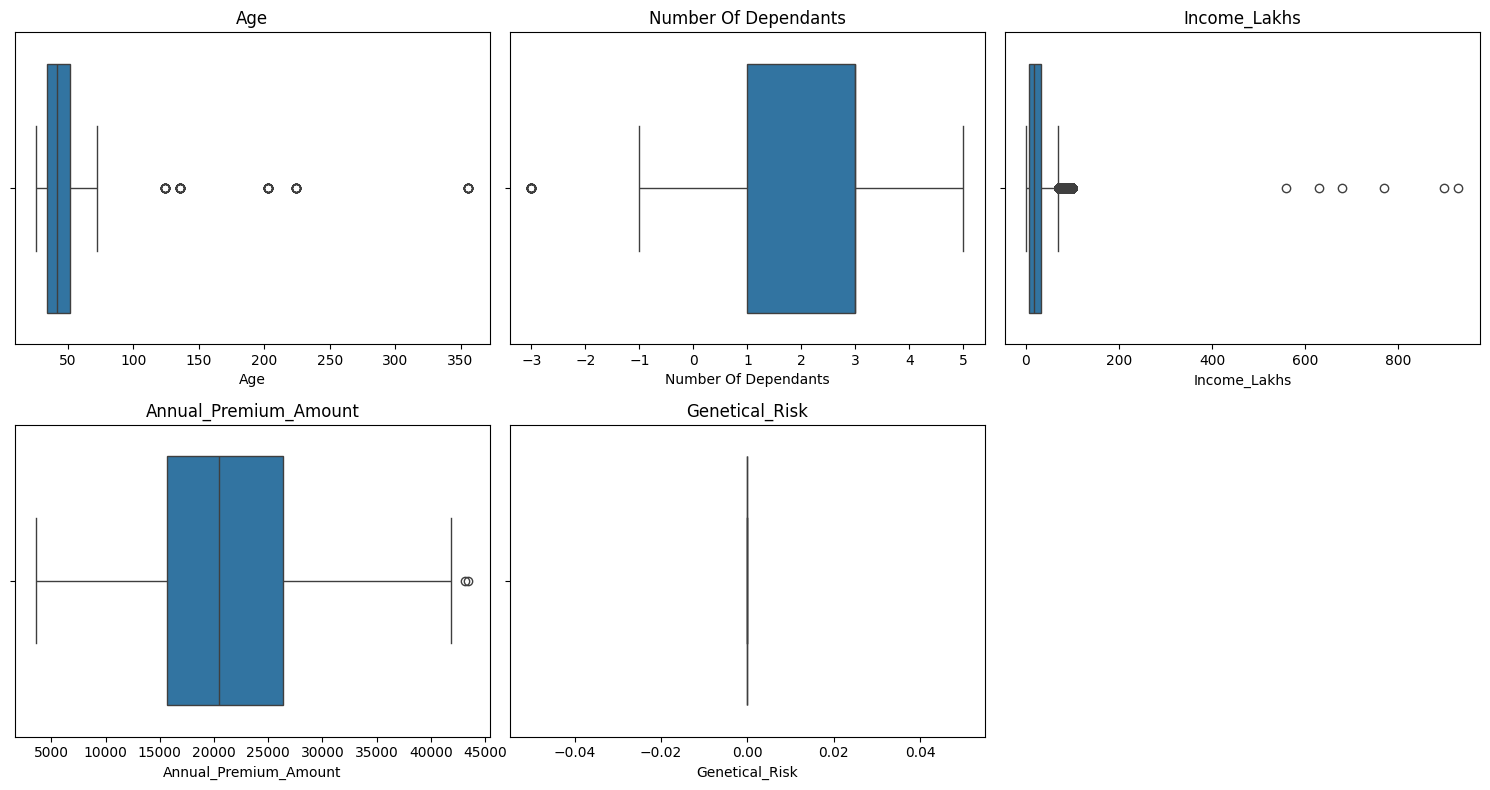

In [12]:
cols = 3
rows = (len(numeric_columns) + cols - 1) // cols  # Compute number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# Flatten the axes array
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Values above 100 in the 'age' column are considered outliers and are being removed.

In [13]:
df=df[df.Age<=100]

In [14]:
df.shape

(29828, 14)

In [15]:
df[df['Number Of Dependants']<0]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
1805,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995,0
2273,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766,0
3513,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979,0
3904,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269,0
4900,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664,0
5917,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779,0
7095,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957,0
7222,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457,0
7551,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406,0
9047,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812,0


Negative values found in the 'Number of Dependents' column are not meaningful, so we are correcting them by taking their absolute values.

In [16]:
df['Number Of Dependants']=df['Number Of Dependants'].abs()

In [17]:
df[df['Number Of Dependants']<0]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk


Although some entries in 'Income_Lakhs' exceed 800 lakhs, values above 100 lakhs are considered outliers by stakeholders, so we are removing them

In [18]:
df[df['Income_Lakhs']>100]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
1598,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692,0
4657,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010,0
5399,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848,0
6149,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945,0
21176,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115,0
24489,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926,0


In [19]:
df=df[df['Income_Lakhs']<100]

In [20]:
df1=df.copy()

In [21]:
df1[df1['Income_Lakhs']>100]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk


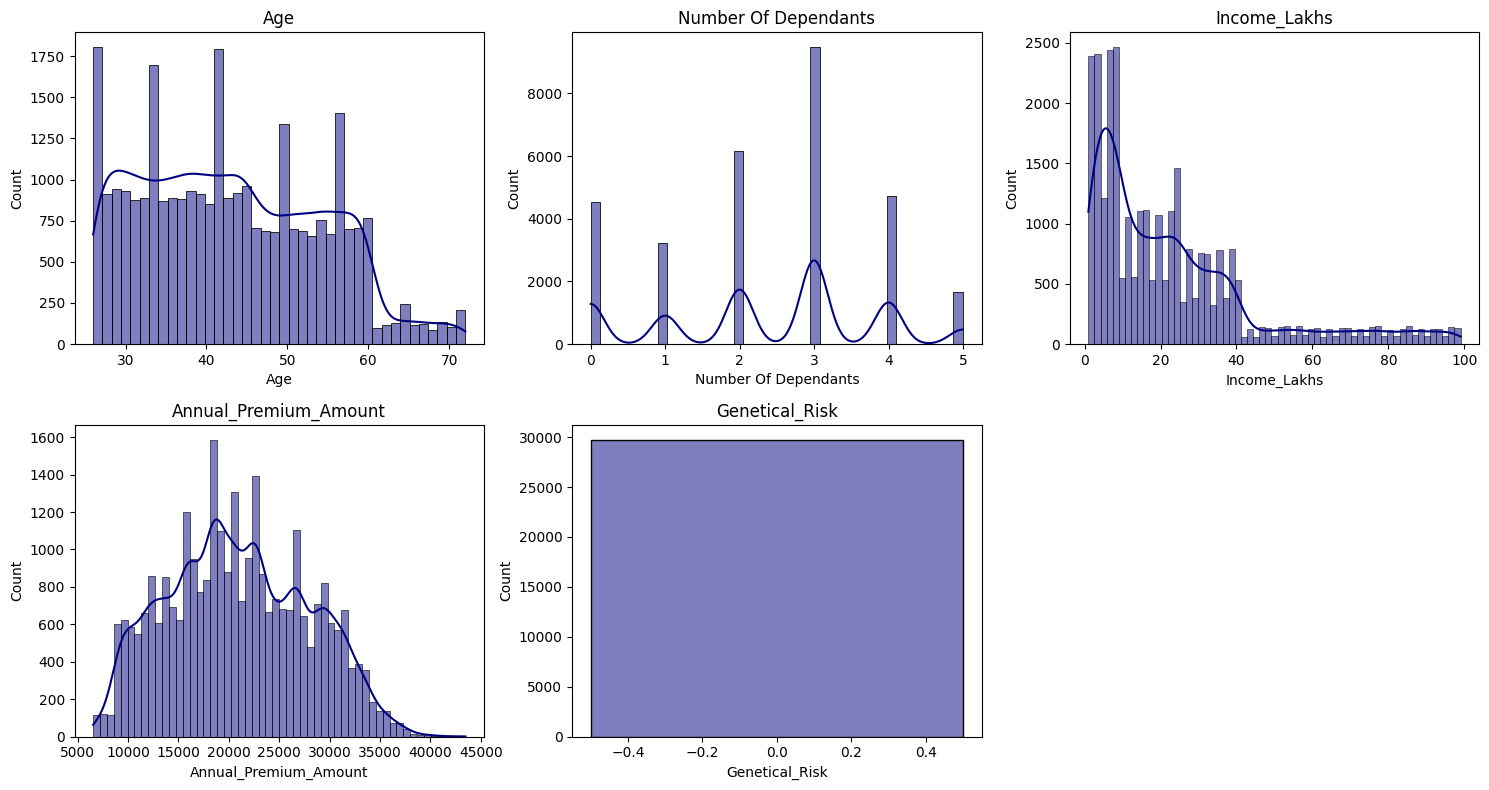

In [22]:
cols = 3
rows = (len(numeric_columns) + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(numeric_columns):
    sns.histplot(df1[col], kde=True, ax=axes[i], color='navy')
    axes[i].set_title(col)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [23]:
df1.head(2)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [24]:
categorical_columns=df1.select_dtypes('object').columns
categorical_columns

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

In [25]:
for col in categorical_columns:
    print(col, ":", df1[col].unique())

Gender : ['Male' 'Female']
Region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status : ['Unmarried' 'Married']
BMI_Category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
Employment_Status : ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
Medical History : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Insurance_Plan : ['Bronze' 'Silver' 'Gold']


Multiple values in the 'Smoking_Status' column (e.g., 'Does Not Smoke', 'Smoking=0', 'Not Smoking') represent non-smoking. We're standardizing them to a single label

In [26]:
df1['Smoking_Status']=df1['Smoking_Status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
})

In [27]:
df1['Smoking_Status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [28]:
fm_pct=df1['Gender'].value_counts(normalize=True)*100
fm_pct

Gender
Male      54.896821
Female    45.103179
Name: proportion, dtype: float64

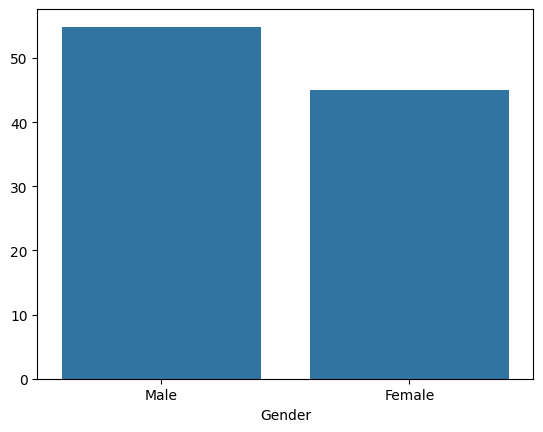

In [29]:
sns.barplot(x=fm_pct.index,y=fm_pct.values)
plt.show()

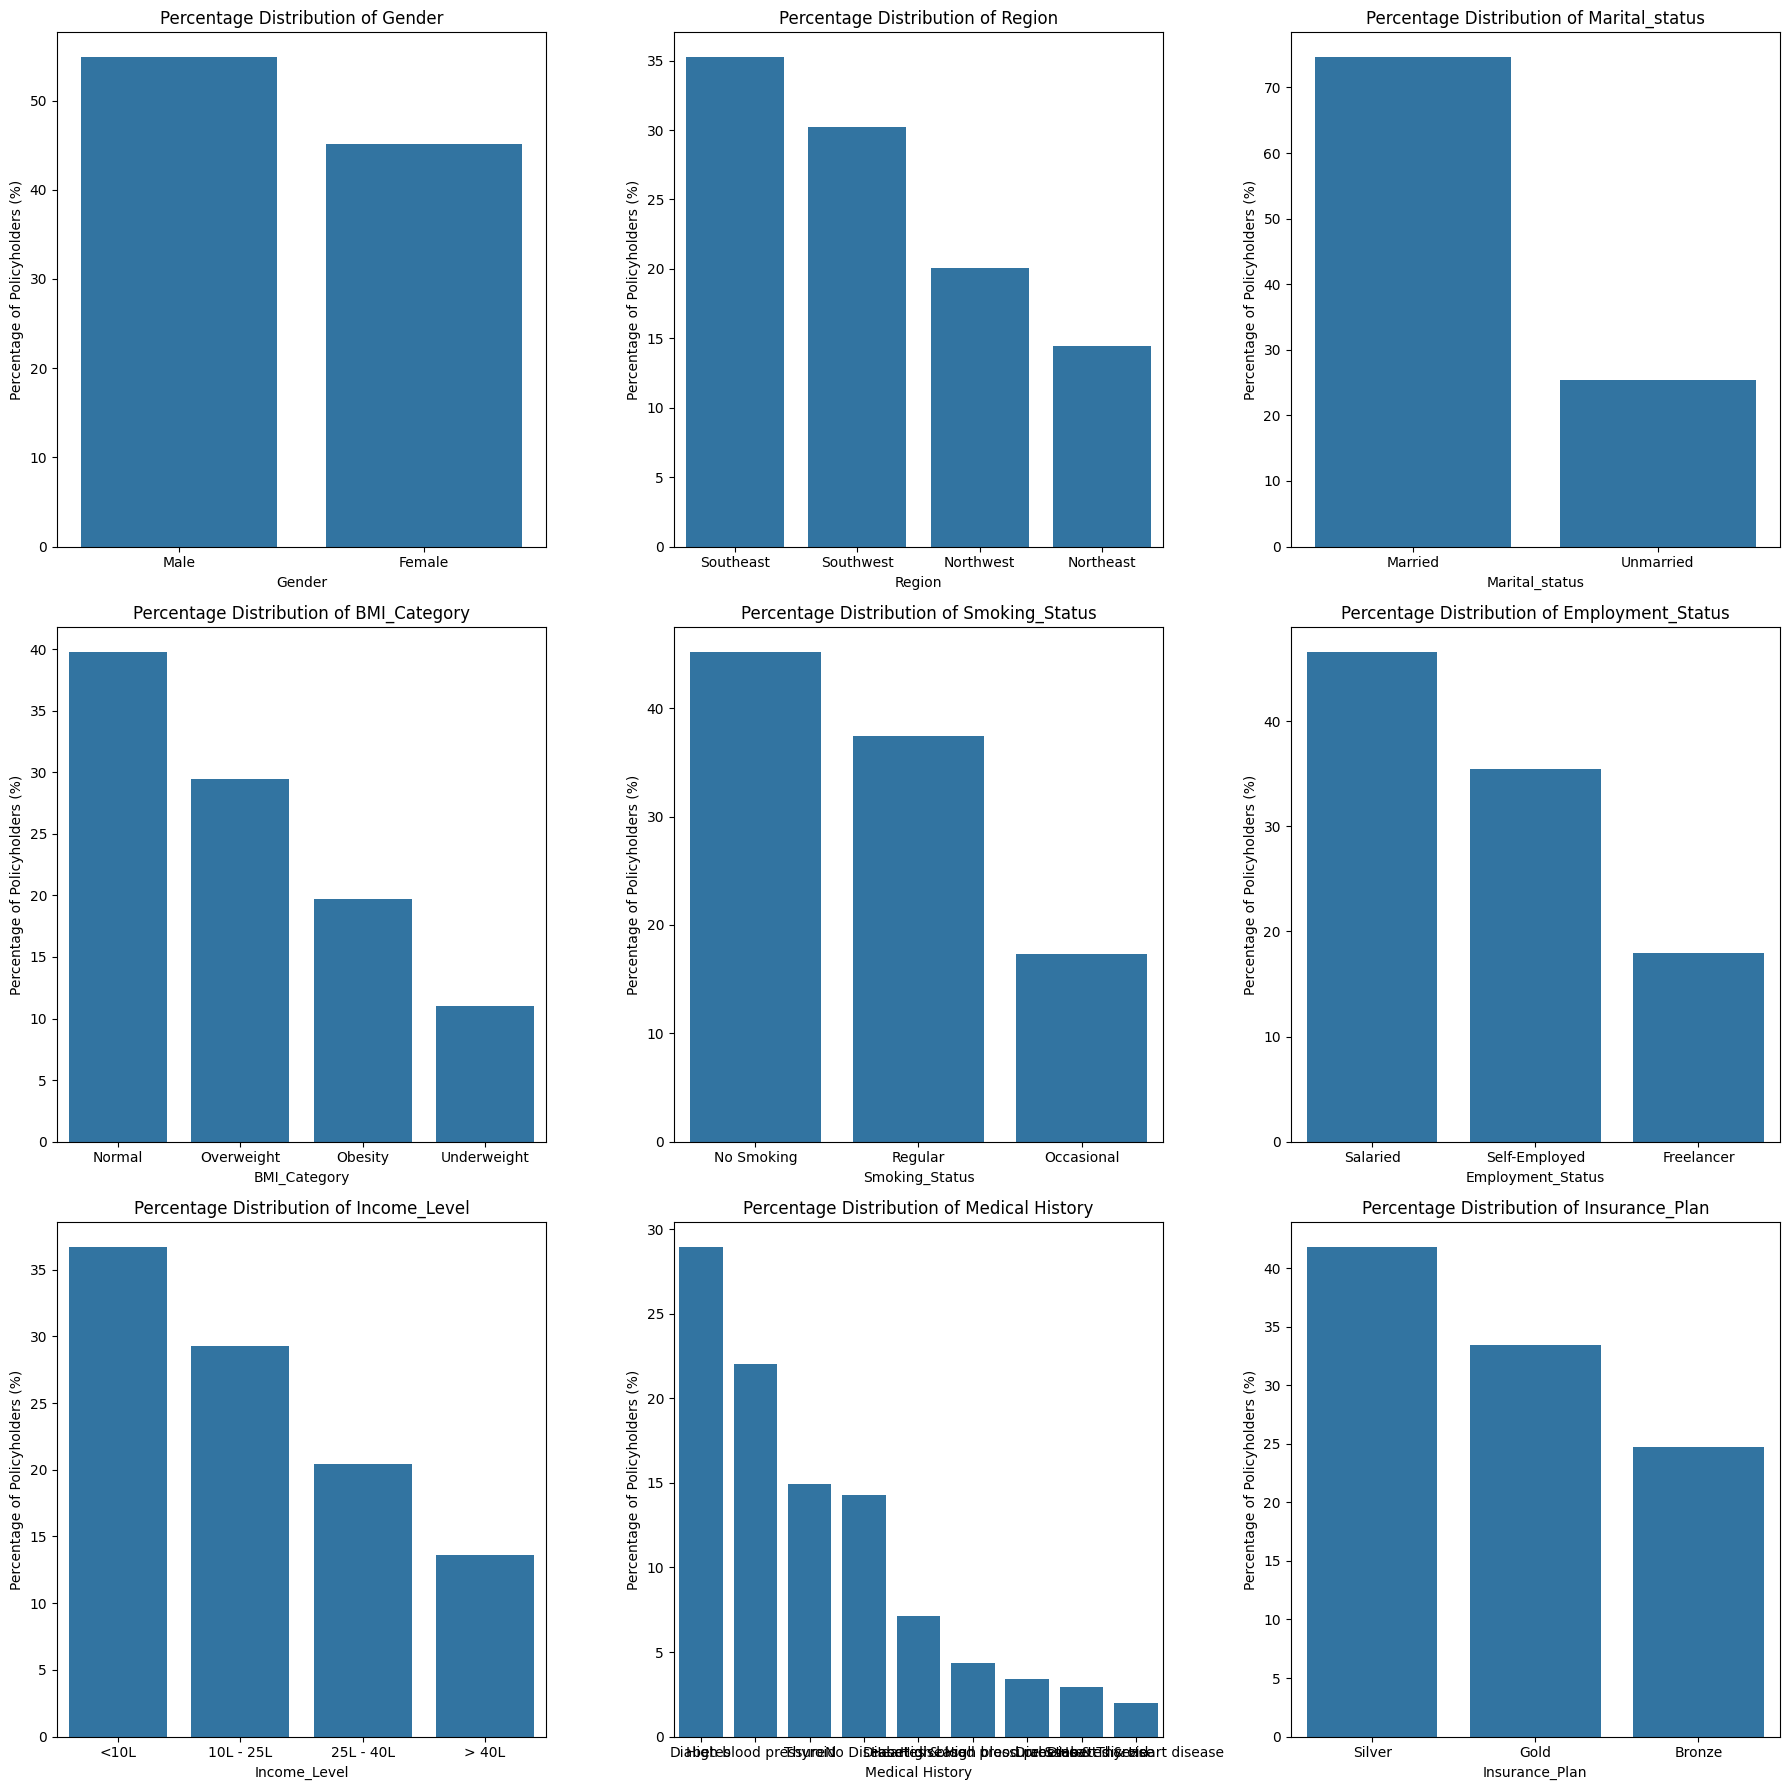

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_columns):
    # Calculate the percentage distribution of each category
    category_counts = df1[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [31]:
crosstab=pd.crosstab(df['Income_Level'],df['Insurance_Plan'])
crosstab

Insurance_Plan,Bronze,Gold,Silver
Income_Level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,211,3231,609


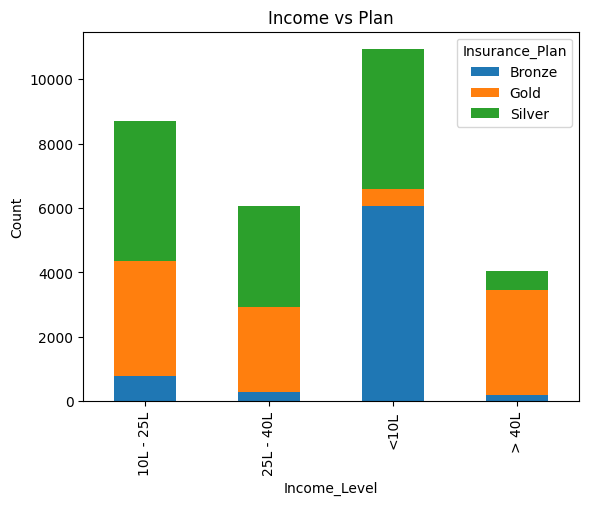

In [32]:
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

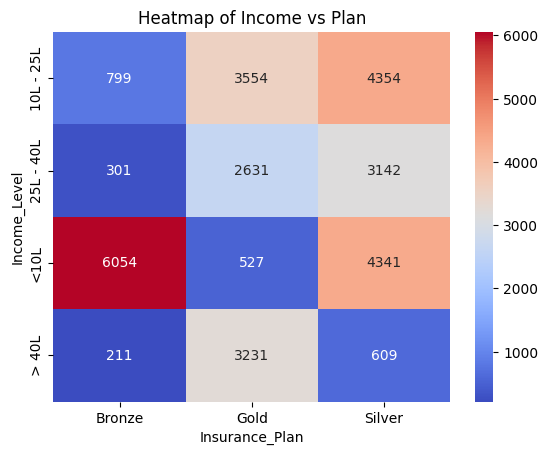

In [33]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

In [34]:
df1.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


### Feature Engineering

In [35]:
df1[['disease1','disease2']]=df1['Medical History'].str.split('&',expand=True).apply(lambda x:x.str.lower())

In [36]:
df2=df1.copy()

In [37]:
df2.shape

(29754, 16)

In [38]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [39]:
df2[['disease1', 'disease2']] = df2['Medical History'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

C:\Users\pruth\AppData\Local\Temp\ipykernel_11240\3374047064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\pruth\AppData\Local\Temp\ipykernel_11240\3374047064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


### Encode Text Columns

In [40]:
categorical_columns

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

In [41]:
df2['Insurance_Plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [42]:
df2['Insurance_Plan']=df2['Insurance_Plan'].map({'Bronze':1,'Silver':2,'Gold':3})

In [43]:
df2['Income_Level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [44]:
df2['Income_Level']=df2['Income_Level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})

In [45]:
nominal_columns = ['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status', 'Employment_Status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)

In [46]:
df3.shape

(29754, 24)

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29754 entries, 0 to 29903
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              29754 non-null  int64  
 1   Number Of Dependants             29754 non-null  int64  
 2   Income_Level                     29754 non-null  int64  
 3   Income_Lakhs                     29754 non-null  int64  
 4   Medical History                  29754 non-null  object 
 5   Insurance_Plan                   29754 non-null  int64  
 6   Annual_Premium_Amount            29754 non-null  int64  
 7   Genetical_Risk                   29754 non-null  int64  
 8   disease1                         29754 non-null  object 
 9   disease2                         29754 non-null  object 
 10  total_risk_score                 29754 non-null  int64  
 11  normalized_risk_score            29754 non-null  float64
 12  Gender_Male            

### Feature Selection

In [48]:
df4 = df3.drop(['Medical History','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)              

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
df4.columns

Index(['Age', 'Number Of Dependants', 'Income_Level', 'Income_Lakhs',
       'Insurance_Plan', 'Annual_Premium_Amount', 'Genetical_Risk',
       'normalized_risk_score', 'Gender_Male', 'Region_Northwest',
       'Region_Southeast', 'Region_Southwest', 'Marital_status_Unmarried',
       'BMI_Category_Obesity', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'Smoking_Status_Occasional',
       'Smoking_Status_Regular', 'Employment_Status_Salaried',
       'Employment_Status_Self-Employed'],
      dtype='object')

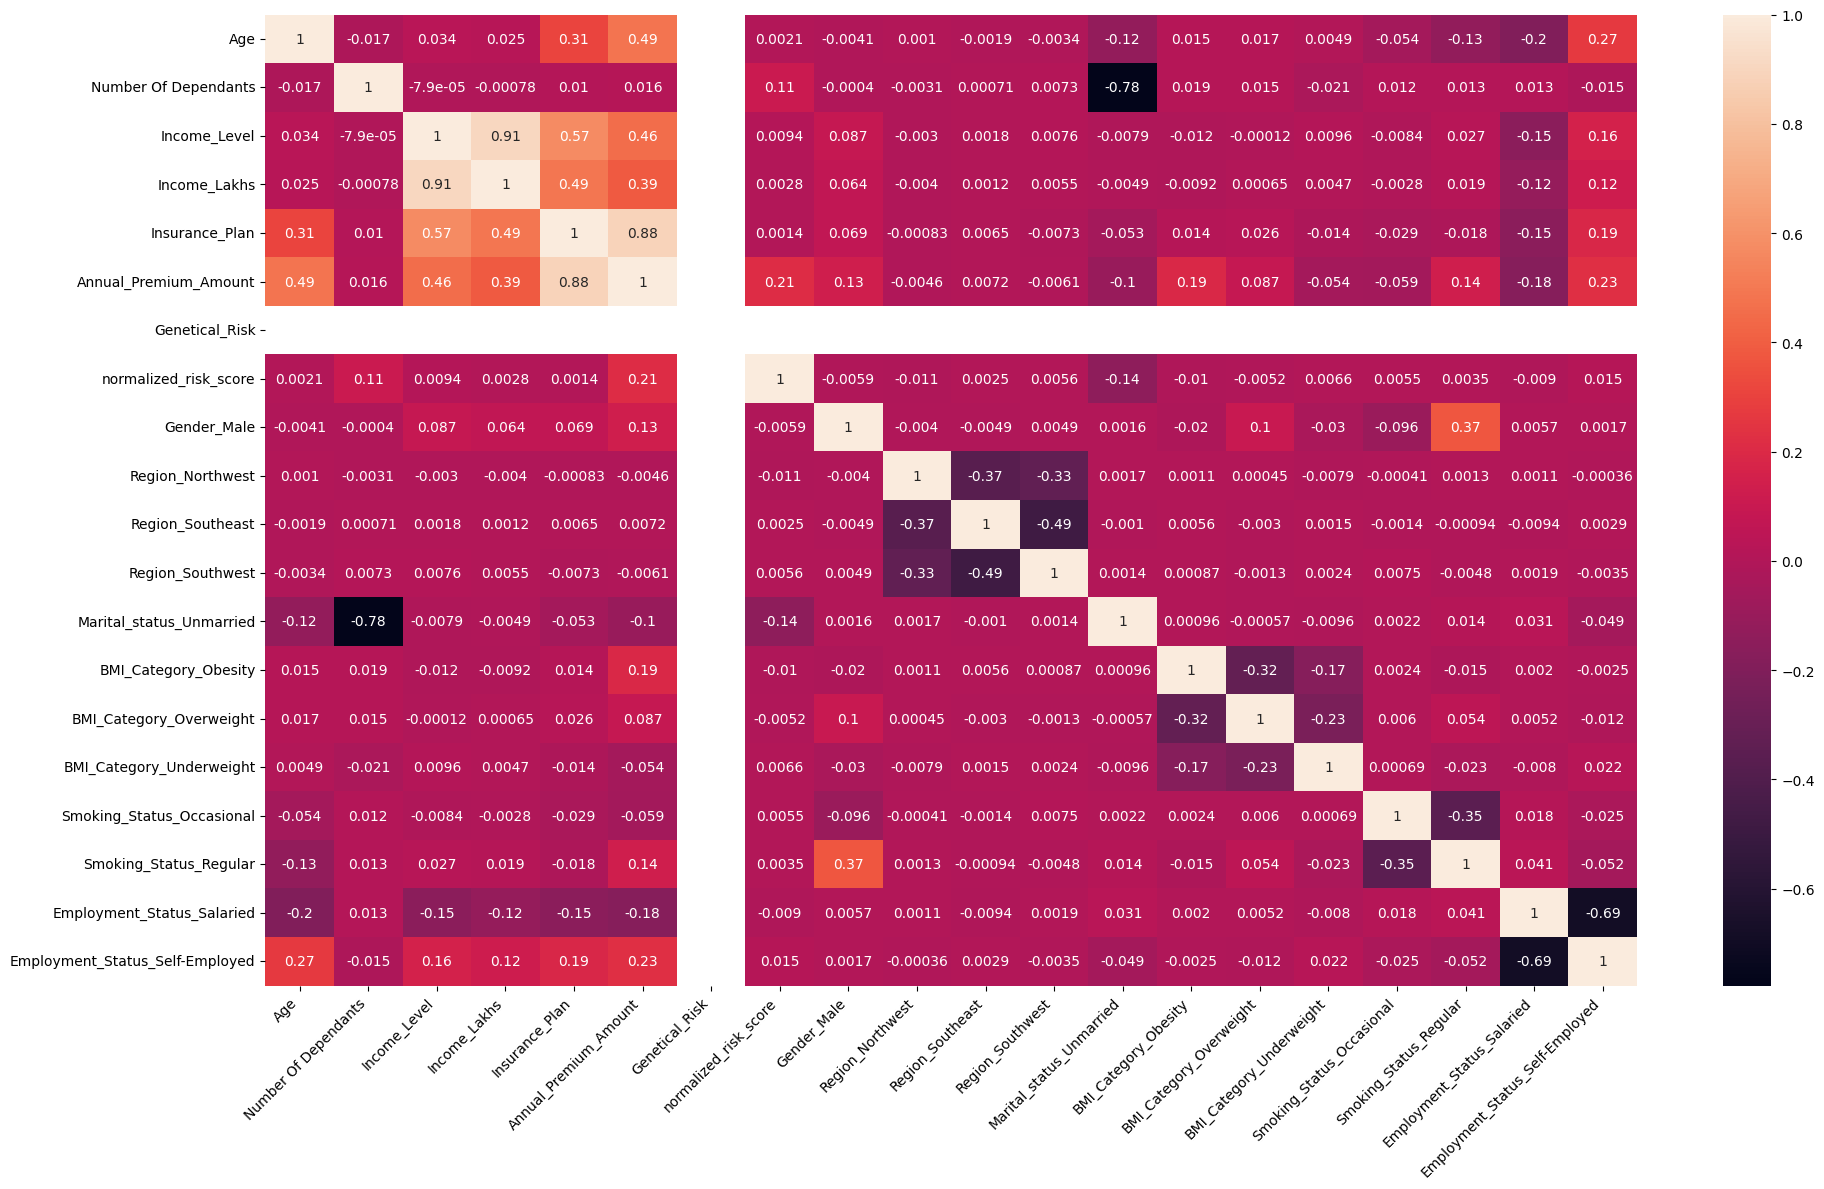

In [50]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
X=df4.drop('Annual_Premium_Amount',axis=1)
y=df['Annual_Premium_Amount']

In [52]:
df4.columns

Index(['Age', 'Number Of Dependants', 'Income_Level', 'Income_Lakhs',
       'Insurance_Plan', 'Annual_Premium_Amount', 'Genetical_Risk',
       'normalized_risk_score', 'Gender_Male', 'Region_Northwest',
       'Region_Southeast', 'Region_Southwest', 'Marital_status_Unmarried',
       'BMI_Category_Obesity', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'Smoking_Status_Occasional',
       'Smoking_Status_Regular', 'Employment_Status_Salaried',
       'Employment_Status_Self-Employed'],
      dtype='object')

In [53]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age','Number Of Dependants', 'Income_Level',  'Income_Lakhs', 'Insurance_Plan','Genetical_Risk']
scaler = MinMaxScaler()

X[columns_to_scale]=scaler.fit_transform(X[columns_to_scale])

In [54]:
X.describe()

,Age,Number Of Dependants,Income_Level,Income_Lakhs,Insurance_Plan,Genetical_Risk,normalized_risk_score,Gender_Male,Region_Northwest,Region_Southeast,Region_Southwest,Marital_status_Unmarried,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Smoking_Status_Occasional,Smoking_Status_Regular,Employment_Status_Salaried,Employment_Status_Self-Employed
count,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.0,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000
mean,0.371683,0.477536,0.369788,0.225009,0.543322,0.0,0.426404,0.548968,0.200746,0.352726,0.301875,0.253378,0.196982,0.294918,0.110103,0.173254,0.374605,0.466189,0.354272
std,0.240080,0.284145,0.350221,0.226314,0.378885,0.0,0.240132,0.497605,0.400565,0.477826,0.459079,0.434953,0.397725,0.456014,0.313023,0.378473,0.484029,0.498864,0.478300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.061224,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.163265,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.316327,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [56]:
calculate_vif(X)

C:\Users\pruth\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,Age,3.924740
1,Number Of Dependants,6.276728
2,Income_Level,14.063416
3,Income_Lakhs,11.408527
4,Insurance_Plan,5.260860
5,Genetical_Risk,NaN
6,normalized_risk_score,3.809601
7,Gender_Male,2.598259
8,Region_Northwest,2.123193
9,Region_Southeast,2.979784


The columns 'Income_Level' and 'Income_Lakhs' are highly collinear, meaning they carry overlapping information. To avoid multicollinearity issues, we are removing the 'Income_Level' column

In [57]:
calculate_vif(X.drop('Income_Level', axis="columns"))

C:\Users\pruth\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,Age,3.865086
1,Number Of Dependants,6.276116
2,Income_Lakhs,2.690925
3,Insurance_Plan,4.571804
4,Genetical_Risk,NaN
5,normalized_risk_score,3.807473
6,Gender_Male,2.590560
7,Region_Northwest,2.122529
8,Region_Southeast,2.978859
9,Region_Southwest,2.706927


In [58]:
X_reduced = X.drop('Income_Level', axis="columns")

### Model Training

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.30,random_state=18)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (20827, 18)
x test:  (8927, 18)
y train:  (20827,)
y test:  (8927,)


### Linear Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

train_score=model_lr.score(X_train,y_train)
test_score=model_lr.score(X_test,y_test)

train_score,test_score

(0.9544124911019922, 0.9515102239125596)

In [61]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  2325832.2566622146 RMSE:  1525.0679514901014


In [62]:
model_lr.coef_

array([ 6.98852936e+03, -1.32619216e+03, -7.35562050e+02,  1.48421585e+04,
       -1.81898940e-12,  6.01751571e+03,  8.52688917e+01, -2.64656666e+01,
        3.25498650e+00,  5.56510913e+00, -7.16000402e+02,  3.90283967e+03,
        1.99034117e+03,  5.86321287e+02,  8.46687120e+02,  2.78813004e+03,
       -5.54374735e+01,  2.55469867e+02])

In [63]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_lr.coef_
})

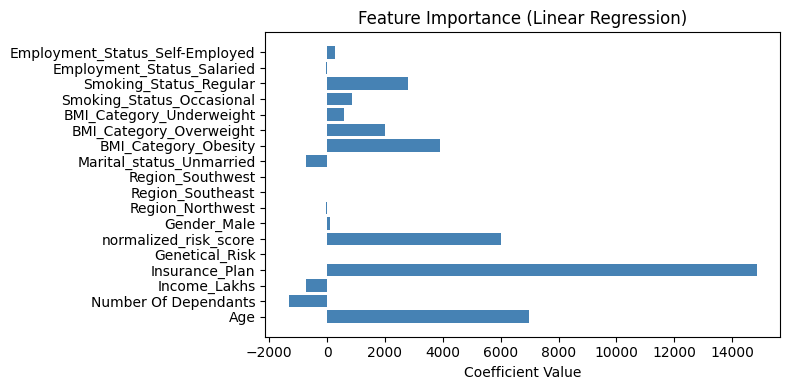

In [64]:
plt.figure(figsize=(8, 4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression)')
plt.tight_layout()
plt.show()

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

model_rfr=RandomForestRegressor()

model_rfr.fit(X_train,y_train)

model_rfr.score(X_test,y_test)

0.9976738282284423

In [66]:
y_pred = model_rfr.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfrr = np.sqrt(mse_lr)
print("Random Forest ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Random Forest ==> MSE:  2325832.2566622146 RMSE:  1525.0679514901014


### XGBoost

In [67]:
from xgboost import XGBRFRegressor

model_xgb=XGBRFRegressor()

model_xgb.fit(X_train,y_train)

model_xgb.score(X_test,y_test)

0.9718770980834961

In [68]:
model_xgb=XGBRFRegressor()

params={
    'n_estimators':[20,40,50],
    'max_depth':[5,10,20]
    
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV

model_RSC=RandomizedSearchCV(model_xgb,params,cv=4,n_iter=5)

In [70]:
model_RSC.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                            random_state=None, ...),
                   n_iter=5,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [20, 40, 50]})

In [71]:
model_RSC.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=40, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [72]:
model_RSC.best_params_

{'n_estimators': 40, 'max_depth': 10}

In [73]:
model_RSC.best_score_

np.float64(0.9975680559873581)

In [74]:
best_model=model_RSC.best_estimator_

In [75]:
best_model.feature_importances_

array([1.8885767e-03, 6.6291700e-06, 4.4025548e-04, 9.8191422e-01,
       0.0000000e+00, 1.6432384e-03, 3.0515735e-05, 3.6953927e-06,
       3.7970174e-06, 3.7669295e-06, 1.2950794e-05, 4.9647363e-03,
       1.2234092e-03, 2.9654726e-05, 1.3181206e-04, 7.6956344e-03,
       3.3526801e-06, 3.7651218e-06], dtype=float32)

In [76]:
y_pred=best_model.predict(X_test)

### Error Analysis

In [77]:
residuals=y_pred-y_test
residuals_pct=((residuals/y_test)*100).round(2)

In [78]:
results_df=pd.DataFrame(
    {
        'actual':y_test,
        'predicted':y_pred,
        'diff':residuals,
        'diff_pct':residuals_pct
        
    }
)

In [79]:
results_df

,actual,predicted,diff,diff_pct
12989,16154,16598.896484,444.896484,2.75
8904,22780,22564.896484,-215.103516,-0.94
16686,9374,9135.596680,-238.403320,-2.54
4080,22807,22510.964844,-296.035156,-1.30
600,15437,15737.836914,300.836914,1.95
...,...,...,...,...
20311,18886,18705.441406,-180.558594,-0.96
11748,22542,22524.898438,-17.101562,-0.08
14812,11473,11047.737305,-425.262695,-3.71
3172,18726,18570.939453,-155.060547,-0.83


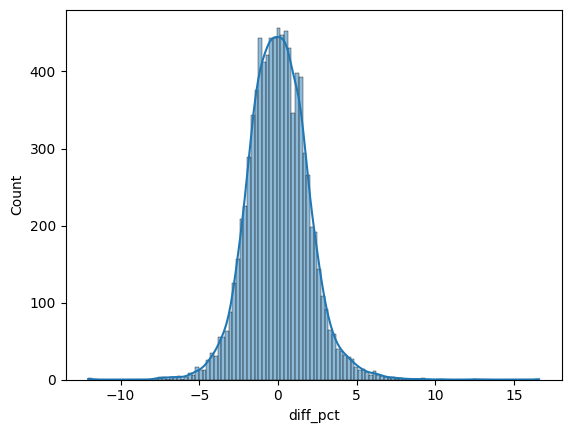

In [80]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [81]:
extreme_error_threshold=10

extreme_results_df=results_df[results_df['diff_pct'].abs()>extreme_error_threshold]

extreme_results_df

,actual,predicted,diff,diff_pct
13426,25378,28558.863281,3180.863281,12.53
8774,20582,18125.882812,-2456.117188,-11.93
14650,12130,13382.266602,1252.266602,10.32
3149,12118,14131.270508,2013.270508,16.61
12617,12569,11053.507812,-1515.492188,-12.06


In [82]:
extreme_results_df.shape

(5, 4)

Here we have only 4 extreme errors

In [83]:
results_df.shape

(8927, 4)

In [84]:
extreme_results_df.shape[0]/results_df.shape[0]*100

0.05600985773496135

There are no results present which having error percentage greater than 50

In [85]:
results_df[results_df['diff_pct'].abs()>50]

,actual,predicted,diff,diff_pct
